In [3]:
import os
os.environ.setdefault("PYTHONUTF8", "1")

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import json
import sys
from pathlib import Path

from dotenv import load_dotenv

# repo root → makes `processing_layer` importable
sys.path.insert(0, str(Path().resolve().parent.parent))
load_dotenv(Path().resolve().parent.parent / ".env")

True

In [5]:
import fiftyone as fo
from fiftyone.utils.huggingface import load_from_hub

N_SAMPLES = 1
DATASET_NAME = "Voxel51/high-quality-invoice-images-for-ocr"

if fo.dataset_exists(DATASET_NAME):
    print("Loading cached dataset…")
    dataset = fo.load_dataset(DATASET_NAME)
else:
    print(f"Downloading {N_SAMPLES} samples from HuggingFace…")
    dataset = load_from_hub(DATASET_NAME, max_samples=N_SAMPLES)

annotated = [s for s in dataset if s["json_annotation"] is not None]
print(f"{len(annotated)} annotated / {len(dataset)} loaded")

C:\Machine Learning\projects\HackEurope_2026\processing_layer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading cached dataset…
5 annotated / 5 loaded


In [6]:
from processing_layer.extraction.invoice import InvoiceExtractor
from processing_layer.llm.gemini import GeminiProvider

provider = GeminiProvider()
extractor = InvoiceExtractor(provider)
print(f"Using model: {provider.model}")

Using model: gemini-3-flash-preview



Sample 1: batch1-0494.jpg


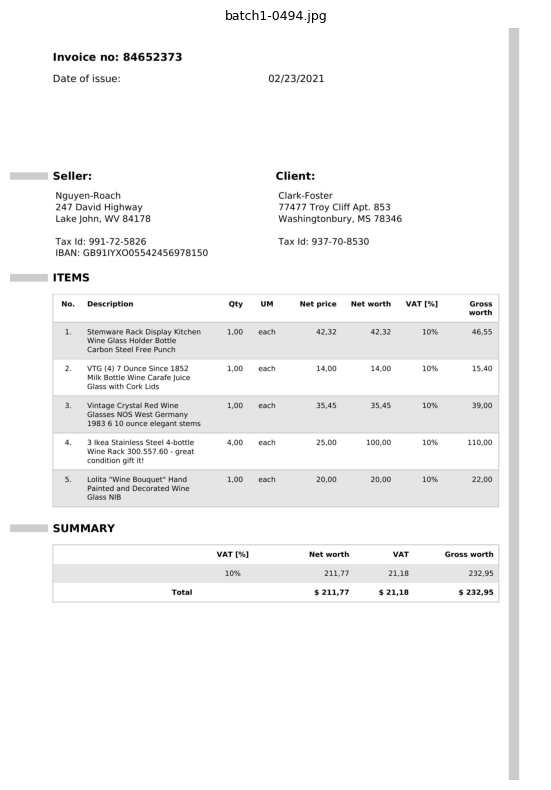


--- Extracted (Gemini) ---
{
  "invoice_number": "84652373",
  "invoice_date": "02/23/2021",
  "due_date": null,
  "vendor_name": "Nguyen-Roach",
  "vendor_address": "247 David Highway Lake John, WV 84178",
  "client_name": "Clark-Foster",
  "client_address": "77477 Troy Cliff Apt. 853 Washingtonbury, MS 78346",
  "line_items": [
    {
      "description": "Stemware Rack Display Kitchen Wine Glass Holder Bottle Carbon Steel Free Punch",
      "quantity": 1.0,
      "unit_price": 42.32,
      "total_price": 42.32,
      "unit": "each"
    },
    {
      "description": "VTG (4) 7 Ounce Since 1852 Milk Bottle Wine Carafe Juice Glass with Cork Lids",
      "quantity": 1.0,
      "unit_price": 14.0,
      "total_price": 14.0,
      "unit": "each"
    },
    {
      "description": "Vintage Crystal Red Wine Glasses NOS West Germany 1983 6 10 ounce elegant stems",
      "quantity": 1.0,
      "unit_price": 35.45,
      "total_price": 35.45,
      "unit": "each"
    },
    {
      "description

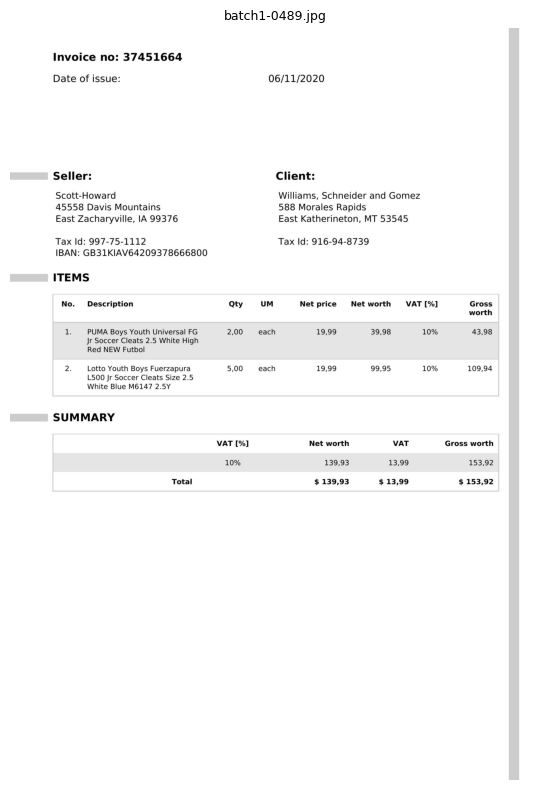


--- Extracted (Gemini) ---
{
  "invoice_number": "37451664",
  "invoice_date": "06/11/2020",
  "due_date": null,
  "vendor_name": "Scott-Howard",
  "vendor_address": "45558 Davis Mountains, East Zacharyville, IA 99376",
  "client_name": "Williams, Schneider and Gomez",
  "client_address": "588 Morales Rapids, East Katherineton, MT 53545",
  "line_items": [
    {
      "description": "PUMA Boys Youth Universal FG Jr Soccer Cleats 2.5 White High Red NEW Futbol",
      "quantity": 2.0,
      "unit_price": 19.99,
      "total_price": 39.98,
      "unit": "each"
    },
    {
      "description": "Lotto Youth Boys Fuerzapura L500 Jr Soccer Cleats Size 2.5 White Blue M6147 2.5Y",
      "quantity": 5.0,
      "unit_price": 19.99,
      "total_price": 99.95,
      "unit": "each"
    }
  ],
  "subtotal": 139.93,
  "tax": 13.99,
  "total": 153.92,
  "currency": "USD"
}

--- Ground truth ---
{
  "invoice": {
    "client_name": "Williams, Schneider and Gomez",
    "client_address": "588 Morales Ra

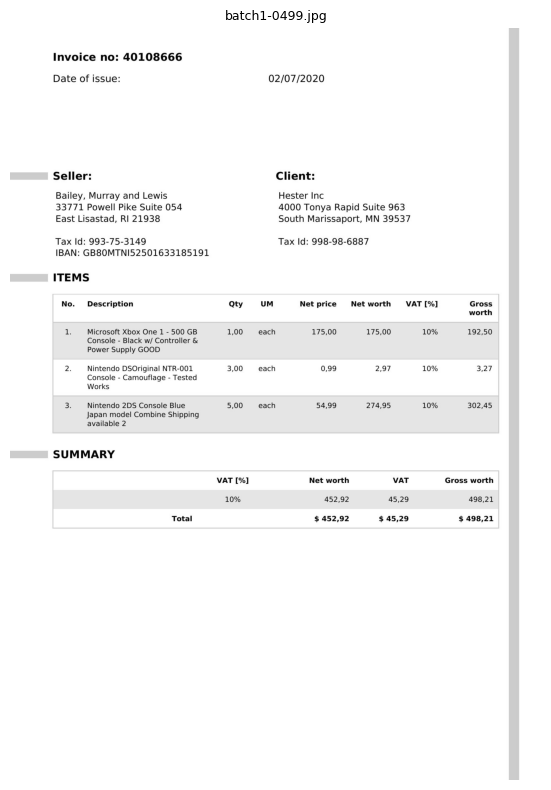


--- Extracted (Gemini) ---
{
  "invoice_number": "40108666",
  "invoice_date": "02/07/2020",
  "due_date": null,
  "vendor_name": "Bailey, Murray and Lewis",
  "vendor_address": "33771 Powell Pike Suite 054, East Lisastad, RI 21938",
  "client_name": "Hester Inc",
  "client_address": "4000 Tonya Rapid Suite 963, South Marissaport, MN 39537",
  "line_items": [
    {
      "description": "Microsoft Xbox One 1 - 500 GB Console - Black w/ Controller & Power Supply GOOD",
      "quantity": 1.0,
      "unit_price": 175.0,
      "total_price": 175.0,
      "unit": "each"
    },
    {
      "description": "Nintendo DSOriginal NTR-001 Console - Camouflage - Tested Works",
      "quantity": 3.0,
      "unit_price": 0.99,
      "total_price": 2.97,
      "unit": "each"
    },
    {
      "description": "Nintendo 2DS Console Blue Japan model Combine Shipping available 2",
      "quantity": 5.0,
      "unit_price": 54.99,
      "total_price": 274.95,
      "unit": "each"
    }
  ],
  "subtotal": 4

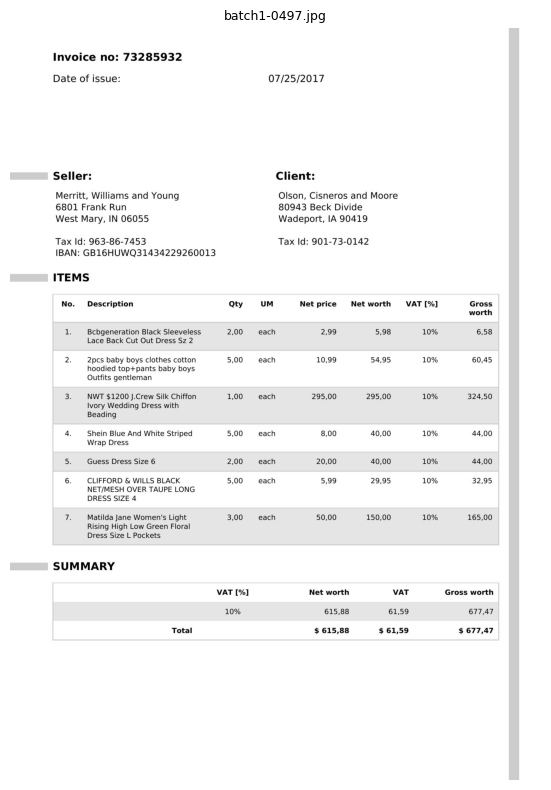


--- Extracted (Gemini) ---
{
  "invoice_number": "73285932",
  "invoice_date": "07/25/2017",
  "due_date": null,
  "vendor_name": "Merritt, Williams and Young",
  "vendor_address": "6801 Frank Run, West Mary, IN 06055",
  "client_name": "Olson, Cisneros and Moore",
  "client_address": "80943 Beck Divide, Wadeport, IA 90419",
  "line_items": [
    {
      "description": "Bcbgeneration Black Sleeveless Lace Back Cut Out Dress Sz 2",
      "quantity": 2.0,
      "unit_price": 2.99,
      "total_price": 5.98,
      "unit": "each"
    },
    {
      "description": "2pcs baby boys clothes cotton hoodied top+pants baby boys Outfits gentleman",
      "quantity": 5.0,
      "unit_price": 10.99,
      "total_price": 54.95,
      "unit": "each"
    },
    {
      "description": "NWT $1200 J.Crew Silk Chiffon Ivory Wedding Dress with Beading",
      "quantity": 1.0,
      "unit_price": 295.0,
      "total_price": 295.0,
      "unit": "each"
    },
    {
      "description": "Shein Blue And White 

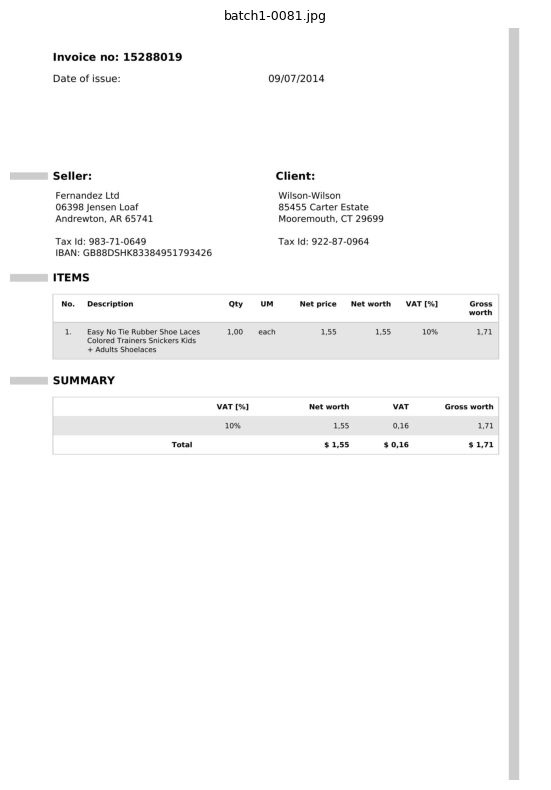


--- Extracted (Gemini) ---
{
  "invoice_number": "15288019",
  "invoice_date": "09/07/2014",
  "due_date": null,
  "vendor_name": "Fernandez Ltd",
  "vendor_address": "06398 Jensen Loaf, Andrewton, AR 65741",
  "client_name": "Wilson-Wilson",
  "client_address": "85455 Carter Estate, Mooremouth, CT 29699",
  "line_items": [
    {
      "description": "Easy No Tie Rubber Shoe Laces Colored Trainers Snickers Kids + Adults Shoelaces",
      "quantity": 1.0,
      "unit_price": 1.55,
      "total_price": 1.55,
      "unit": "each"
    }
  ],
  "subtotal": 1.55,
  "tax": 0.16,
  "total": 1.71,
  "currency": "$"
}

--- Ground truth ---
{
  "invoice": {
    "client_name": "Wilson-Wilson",
    "client_address": "85455 Carter Estate\nMooremouth, CT 29699",
    "seller_name": "Fernandez Ltd",
    "seller_address": "06398 Jensen Loaf\nAndrewton, AR 65741",
    "invoice_number": "15288019",
    "invoice_date": "09/07/2014",
    "due_date": ""
  },
  "items": [
    {
      "description": "Easy No 

In [7]:
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

results = []

for i, sample in enumerate(annotated):
    print(f"\n{'='*70}")
    print(f"Sample {i+1}: {Path(sample.filepath).name}")
    print(f"{'='*70}")

    # --- plot invoice image ---
    img = Image.open(sample.filepath)
    fig, axes = plt.subplots(1, 1, figsize=(6, 8))
    axes.imshow(img)
    axes.axis("off")
    axes.set_title(Path(sample.filepath).name, fontsize=9)
    plt.tight_layout()
    plt.show()

    # --- call Gemini ---
    image_bytes = Path(sample.filepath).read_bytes()
    extracted = extractor.extract_from_image(image_bytes, "image/jpeg")
    gt = json.loads(sample["json_annotation"])

    results.append({"sample": Path(sample.filepath).name, "extracted": extracted, "ground_truth": gt})

    # --- side-by-side comparison ---
    print("\n--- Extracted (Gemini) ---")
    print(extracted.model_dump_json(indent=2))

    print("\n--- Ground truth ---")
    print(json.dumps(gt, indent=2))

In [8]:
# ── Field-level summary ──────────────────────────────────────────────────────
import pandas as pd

summary_rows = []
for r in results:
    ext = r["extracted"]
    gt_inv = r["ground_truth"]["invoice"]
    gt_sub = r["ground_truth"].get("subtotal", {})
    summary_rows.append({
        "file": r["sample"],
        "invoice_number": ext.invoice_number == gt_inv.get("invoice_number"),
        "invoice_date":   ext.invoice_date   == gt_inv.get("invoice_date"),
        "vendor_name":    ext.vendor_name    == gt_inv.get("seller_name"),
        "client_name":    ext.client_name    == gt_inv.get("client_name"),
        "vendor_address": ext.vendor_address == gt_inv.get("seller_address"),
        "client_address": ext.client_address == gt_inv.get("client_address"),
        "total_extracted": ext.total,
        "total_gt":        float(gt_sub.get("total", "nan") or "nan"),
        "total_match":     ext.total is not None and abs(ext.total - float(gt_sub.get("total", 0) or 0)) < 0.01,
        "n_items":         len(ext.line_items) == len(r["ground_truth"].get("items", [])),
    })

df_summary = pd.DataFrame(summary_rows)
display(df_summary)

,file,invoice_number,invoice_date,vendor_name,client_name,vendor_address,client_address,total_extracted,total_gt,total_match,n_items
0,batch1-0494.jpg,True,True,True,True,False,False,232.95,232.95,True,True
1,batch1-0489.jpg,True,True,True,True,False,False,153.92,153.92,True,True
2,batch1-0499.jpg,True,True,True,True,False,False,498.21,498.21,True,True
3,batch1-0497.jpg,True,True,True,True,False,False,677.47,677.47,True,True
4,batch1-0081.jpg,True,True,True,True,False,False,1.71,1.71,True,True


In [ ]:
# ── Per-line-item price comparison ───────────────────────────────────────────
item_rows = []
for r in results:
    ext_items = r["extracted"].line_items
    gt_items  = r["ground_truth"].get("items", [])
    for idx, (ext_item, gt_item) in enumerate(zip(ext_items, gt_items)):
        gt_total  = float(gt_item.get("total_price", "nan") or "nan")
        ext_total = ext_item.total_price
        diff      = ext_total - gt_total if (ext_total is not None and not pd.isna(gt_total)) else None
        pct_diff  = (diff / gt_total * 100) if (diff is not None and gt_total != 0) else None
        item_rows.append({
            "file":        r["sample"],
            "item_idx":    idx + 1,
            "description": ext_item.description[:55] + "…" if len(ext_item.description) > 55 else ext_item.description,
            "qty":         ext_item.quantity,
            "total_extracted": ext_total,
            "total_gt":        gt_total,
            "diff":            round(diff, 2) if diff is not None else None,
            "pct_diff":        round(pct_diff, 1) if pct_diff is not None else None,
            "exact_match":     diff is not None and abs(diff) < 0.01,
        })

df_items = pd.DataFrame(item_rows)

def color_match(val):
    if val is True:  return "background-color: #c8f7c5"
    if val is False: return "background-color: #f7c5c5"
    return ""

display(
    df_items.style
        .map(color_match, subset=["exact_match"])
        .format({"pct_diff": "{:+.1f}%", "diff": "{:+.2f}"}, na_rep="—")
)

In [ ]:
# ── PDF extraction (no ground truth) ─────────────────────────────────────────
from PIL import Image as PilImage
import matplotlib.pyplot as plt

pdf_path = Path().resolve().parent / "_DATASETS" / "Cloud_Invoice_2026.pdf"
assert pdf_path.exists(), f"PDF not found: {pdf_path}"

pdf_result = extractor.extract_from_pdf(pdf_path.read_bytes())

print("--- Extracted from Cloud_Invoice_2026.pdf ---")
print(pdf_result.model_dump_json(indent=2))